# Introduction to Machine Learning

# Logistic Regression (Classification)

## What if the target isn't a number, such as we saw with linear regression, but is a class? Let's try and predict the species of 3 different types of penguins based on various features. 

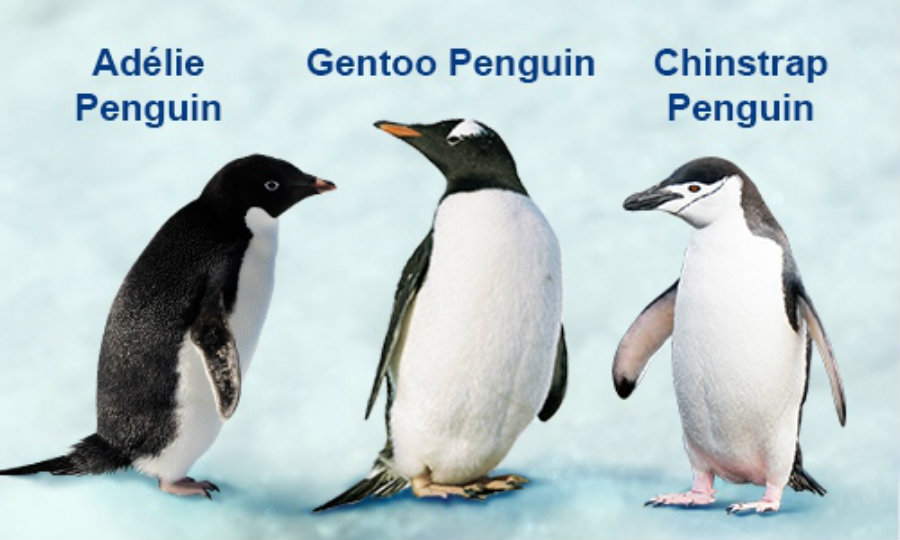

In [ ]:
# import seaborn, matplotlib, pandas, and numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
penguins_df = sns.load_dataset('penguins').dropna()
penguins_df.info()

## Take a quick snapshot of the data using seaborn

## lets look only at two species: Adelie and Gentoo, and make a binary column where Gentoo = 1 and Adelie = 0

In [7]:
df = penguins_df[penguins_df['species']!="Chinstrap"].copy()
df.loc[:, "species_binary"] = df["species"].apply(lambda x: 1 if x=="Gentoo" else 0)

## Looking at the KDE plots we can see that Adelie and Gentoo have the least overlap on flipper length, show the plot of flipper_length vs. species

In [ ]:
sns.scatterplot(data=df, x='flipper_length_mm', y='species_binary', hue='species')
plt.show()

# define our features (X) and Target (Y)

In [ ]:
# define X and y


## Split our data into training and test set 

In [ ]:
# import train test split from sklearn.model_selection

## Fit a linear regression on our training data 

In [ ]:
#import linear regression model from sklearn.linear_model

# define the model
linreg = None

#fit the model


In [ ]:
#plot the data
sns.scatterplot(x=X['flipper_length_mm'], y=y,hue=df['species'])

# Plot the regression line
x_values = np.linspace(X['flipper_length_mm'].min(), X['flipper_length_mm'].max(), 100)
x_values_df = pd.DataFrame(x_values, columns=['flipper_length_mm'])
y_values = linreg.predict(x_values_df)
plt.plot(x_values, y_values, color='red', label='Regression Line')

plt.xlabel('Flipper Length (mm)')
plt.ylabel('Species Binary')
plt.legend()
plt.show()

I we do a linear regression i.e. $y_{pred} = b + wx$ we get some weird results. Remeber we want our predictions to either be 1 or 0. 

$$ p = \frac{1}{1+e^{-y_{pred}}} = \frac{1}{1+e^{-(b+ wx)}} $$
rearraging we get 
$$ \log(\frac{p}{1-p})=b+wx $$ 


## let's run a logistic regression to classify penguins as either Gentoo or Adelie based only on their flipper lengths

In [27]:
# Import the logistic regression model


In [ ]:
# Intialize the logistic regression model
logreg = None
# Fit the model to the training data


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the training data and logistic regression model
sns.scatterplot(ax=axs[0], x=X_train['flipper_length_mm'], y=y_train, hue=df.loc[X_train.index, 'species'], palette='deep')
x_values = np.linspace(X_train['flipper_length_mm'].min(), X_train['flipper_length_mm'].max(), 100)
x_values_df = pd.DataFrame(x_values, columns=['flipper_length_mm'])
y_values = logreg.predict_proba(x_values_df)[:, 1]
axs[0].plot(x_values, y_values, color='red', label='Logistic Regression')
axs[0].set_title('Training Data and Logistic Regression')
axs[0].set_xlabel('Flipper Length (mm)')
axs[0].set_ylabel('Probability of being Gentoo')
axs[0].legend()

# Plot the test data and logistic regression model
sns.scatterplot(ax=axs[1], x=X_test['flipper_length_mm'], y=y_test, hue=df.loc[X_test.index, 'species'], palette='deep')
x_values = np.linspace(X_test['flipper_length_mm'].min(), X_test['flipper_length_mm'].max(), 100)
x_values_df = pd.DataFrame(x_values, columns=['flipper_length_mm'])
y_values = logreg.predict_proba(x_values_df)[:, 1]
axs[1].plot(x_values, y_values, color='red', label='Logistic Regression')
axs[1].set_title('Test Data and Logistic Regression')
axs[1].set_xlabel('Flipper Length (mm)')
axs[1].set_ylabel('Probability of being Gentoo')
axs[1].legend()

plt.tight_layout()
plt.show()

## Let's take a look at this model. How is it deciding if a peguin is Gentoo or Adelie based on their flipper lengths?

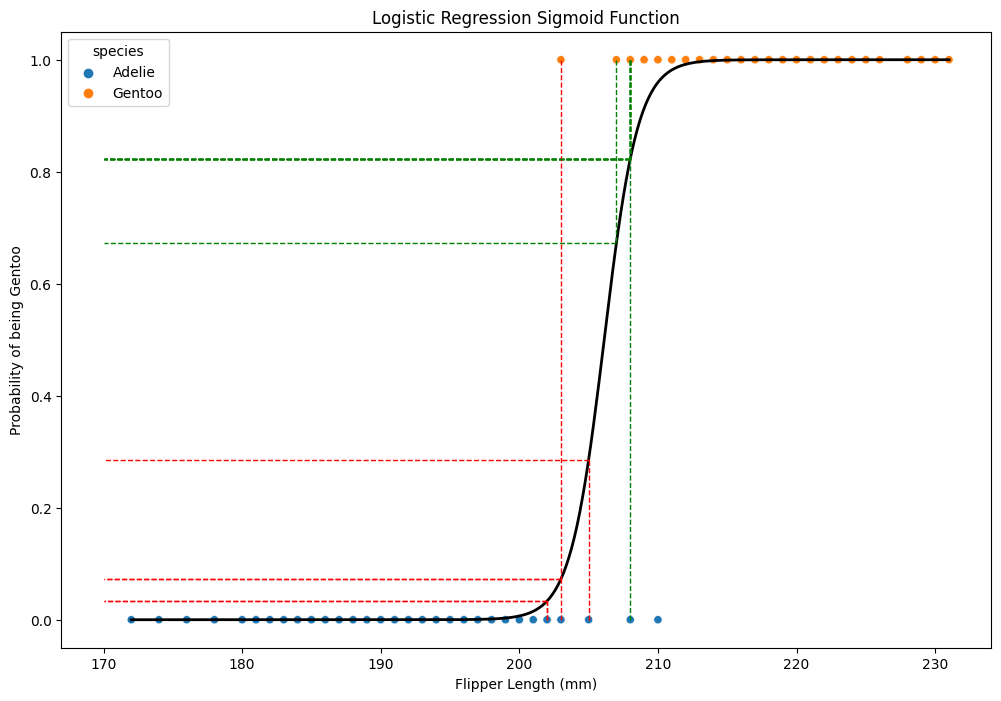

In [ ]:

# # Scatter plot
# sns.scatterplot(data=df, x='flipper_length_mm', y='species_binary', hue='species')

# # Generate a range of values for flipper length
# x_values = np.linspace(X['flipper_length_mm'].min(), X['flipper_length_mm'].max(), 300)
# x_values_df = pd.DataFrame(x_values, columns=['flipper_length_mm'])
# # Predict probabilities using the logistic regression model
# y_values = logreg.predict_proba(x_values_df)[:, 1]

# # Plot the sigmoid function
# plt.plot(x_values, y_values, color='black', linewidth=2)
# plt.xlabel('Flipper Length (mm)')
# plt.ylabel('Probability of being Gentoo')
# plt.title('Logistic Regression Sigmoid Function')

# # Filter the DataFrame to get values between 202 and 208
# filtered_X = df[(df['flipper_length_mm'] >= 202) & (df['flipper_length_mm'] <= 208)]
# y_filt = logreg.predict_proba(filtered_X[["flipper_length_mm"]])[:, 1]

# # Keep track of points that already have a line drawn
# drawn_points = set()

# for i in filtered_X.index:
#         point = filtered_X.loc[i, 'flipper_length_mm']
#         y_val = logreg.predict_proba([[point]])[0][1]
#         spec = filtered_X.loc[i, 'species_binary']
#         # Draw a line from the random point to the sigmoid curve
#         if y_val > 0.5:
#             plt.plot([point, point], [1 if spec == 1 else 0, y_val], color='green', linestyle='--', linewidth=1)
#         else:
#             plt.plot([point, point], [1 if spec == 1 else 0, y_val], color='red', linestyle='--', linewidth=1)

#         # Draw a line from the sigmoid curve to x=170 and y=y_val
#         if y_val > 0.5:
#             plt.plot([point, 170], [y_val, y_val], color='green', linestyle='--', linewidth=1)
#         else:
#             plt.plot([point, 170], [y_val, y_val], color='red', linestyle='--', linewidth=1)




# plt.gcf().set_size_inches(12, 8)
# plt.show()


## What is the preformance of our model?

## let's go back and now do a logistic regression for all 3 species and all numerical features 

In [162]:
X = penguins_df.drop(columns=['species', 'island','sex'])
y = penguins_df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg=LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

# Cross Validation

+ separates the data into n different training/test splits 
+ traverses the entire data set 
+ useful for model selection and tuning hyper-parameters

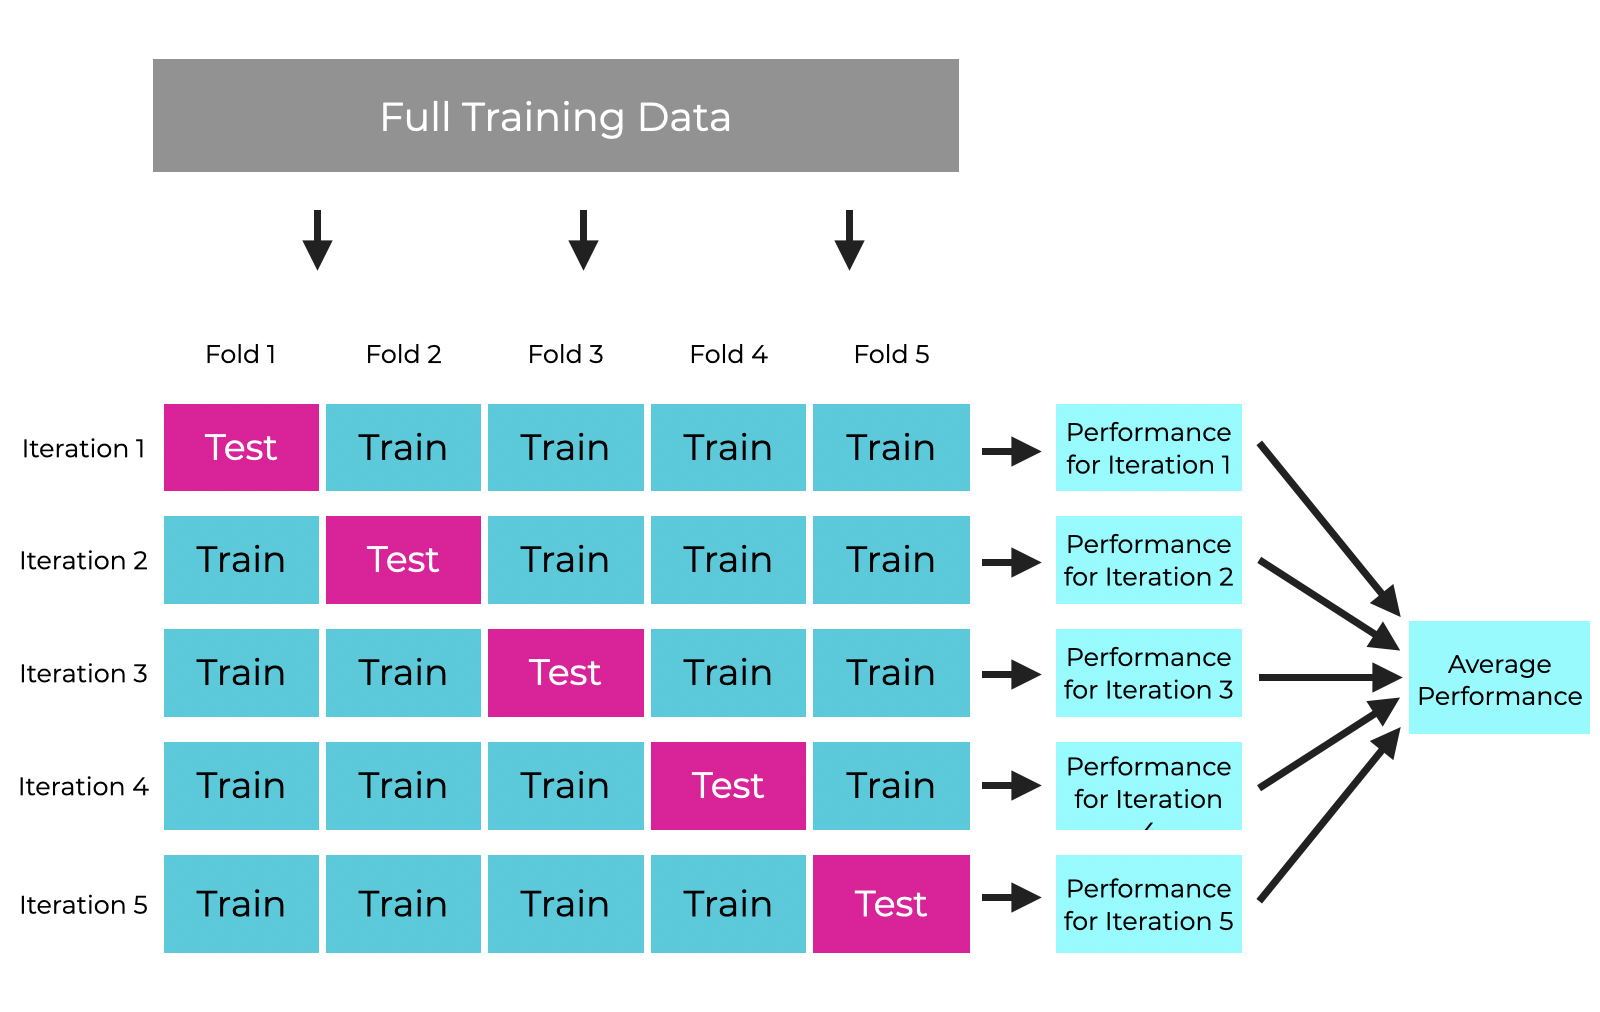

In [ ]:
# import cross_validate from sklearn


In [ ]:
# Perform cross-validation

In [ ]:
#import confusion matrix from sklearn.metrics

In [ ]:

# Predict the labels for the test set
y_pred = None

#create the confusion matrix
cm = None

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()